In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read annotation

In [2]:
df_annot = pd.read_excel('genome_comparison-PA14jbx.xlsx')
df_annot = df_annot[df_annot.comp_genome_1_hit == 'bi (<->)']
df_annot = df_annot[['ref_genome_patric_id','comp_genome_1_locus_tag', 'comp_genome_1_gene_name', 'comp_genome_1_function']]
df_annot = df_annot.set_index('ref_genome_patric_id')
df_annot.head()

,comp_genome_1_locus_tag,comp_genome_1_gene_name,comp_genome_1_function
ref_genome_patric_id,,,
fig|287.6770.peg.1,PA14_00010,dnaA,Chromosomal replication initiator protein DnaA
fig|287.6770.peg.2,PA14_00020,dnaN,DNA polymerase III beta subunit (EC 2.7.7.7)
fig|287.6770.peg.3,PA14_00030,recF,DNA recombination and repair protein RecF
fig|287.6770.peg.4,PA14_00050,gyrB,DNA gyrase subunit B (EC 5.99.1.3)
fig|287.6770.peg.6,PA14_00060,NaN,Acyl-CoA:1-acyl-sn-glycerol-3-phosphate acyltr...


# Read data

In [3]:
df_entropy = pd.read_csv('total_entropy.csv', index_col=0).sort_values(by='entropy', ascending=False)
df_entropy = pd.merge(df_entropy, df_annot, how='left', left_index=True, right_index=True)
label = []
for index in df_entropy.index:
    if str(df_entropy.loc[index,'comp_genome_1_gene_name']) == 'nan':
        label.append(index.replace('fig|287.6770.',''))
    else:
        label.append(index.replace('fig|287.6770.','')+' (%s)'%(df_entropy.loc[index,'comp_genome_1_gene_name']))
df_entropy['label'] = label
df_entropy = df_entropy[['entropy','label']]
df_entropy.head()

,entropy,label
UCBPP-PA14,,
fig|287.6770.peg.1933,265.287803,peg.1933
fig|287.6770.peg.2806,217.241997,peg.2806 (pvdE)
fig|287.6770.peg.4197,198.646047,peg.4197 (fliD)
fig|287.6770.peg.4639,154.065664,peg.4639
fig|287.6770.peg.645,96.921256,peg.645 (ostA)


In [4]:
df_rhl_prediction_rf = pd.read_csv('RL_prediction_accuracy_cat2_rf.csv', index_col=0).sort_values(by='accuracy', ascending=False)
df_rhl_prediction_rf = pd.merge(df_rhl_prediction_rf, df_annot, how='left', left_index=True, right_index=True)
label = []
for index in df_rhl_prediction_rf.index:
    if str(df_rhl_prediction_rf.loc[index,'comp_genome_1_gene_name']) == 'nan':
        label.append(index.replace('fig|287.6770.',''))
    else:
        label.append(index.replace('fig|287.6770.','')+' (%s)'%(df_rhl_prediction_rf.loc[index,'comp_genome_1_gene_name']))
df_rhl_prediction_rf['label'] = label
df_rhl_prediction_rf = df_rhl_prediction_rf[['accuracy','label']]
df_rhl_prediction_rf.head()

,accuracy,label
UCBPP-PA14,,
fig|287.6770.peg.5751,0.967742,peg.5751 (gcvP1)
fig|287.6770.peg.3727,0.935484,peg.3727 (dnaX)
fig|287.6770.peg.4000,0.903226,peg.4000
fig|287.6770.peg.1588,0.903226,peg.1588
fig|287.6770.peg.4007,0.870968,peg.4007


In [5]:
df_rhl_prediction_dt = pd.read_csv('RL_prediction_accuracy_cat2_dt.csv', index_col=0).sort_values(by='accuracy', ascending=False)
df_rhl_prediction_dt = pd.merge(df_rhl_prediction_dt, df_annot, how='left', left_index=True, right_index=True)
label = []
for index in df_rhl_prediction_dt.index:
    if str(df_rhl_prediction_dt.loc[index,'comp_genome_1_gene_name']) == 'nan':
        label.append(index.replace('fig|287.6770.',''))
    else:
        label.append(index.replace('fig|287.6770.','')+' (%s)'%(df_rhl_prediction_dt.loc[index,'comp_genome_1_gene_name']))
df_rhl_prediction_dt['label'] = label
df_rhl_prediction_dt = df_rhl_prediction_dt[['accuracy','label']]
df_rhl_prediction_dt.head()

,accuracy,label
UCBPP-PA14,,
fig|287.6770.peg.5751,0.967742,peg.5751 (gcvP1)
fig|287.6770.peg.3727,0.935484,peg.3727 (dnaX)
fig|287.6770.peg.4000,0.903226,peg.4000
fig|287.6770.peg.1588,0.903226,peg.1588
fig|287.6770.peg.4007,0.870968,peg.4007


In [6]:
df_sgr_prediction_rf = pd.read_csv('SGR_prediction_accuracy_r2_rf.csv', index_col=0).sort_values(by='R2', ascending=False)
df_sgr_prediction_rf = pd.merge(df_sgr_prediction_rf, df_annot, how='left', left_index=True, right_index=True)
label = []
for index in df_sgr_prediction_rf.index:
    if str(df_sgr_prediction_rf.loc[index,'comp_genome_1_gene_name']) == 'nan':
        label.append(index.replace('fig|287.6770.',''))
    else:
        label.append(index.replace('fig|287.6770.','')+' (%s)'%(df_sgr_prediction_rf.loc[index,'comp_genome_1_gene_name']))
df_sgr_prediction_rf['label'] = label
df_sgr_prediction_rf = df_sgr_prediction_rf[['R2','label']]
df_sgr_prediction_rf.head()

,R2,label
UCBPP-PA14,,
fig|287.6770.peg.3727,0.655791,peg.3727 (dnaX)
fig|287.6770.peg.2331,0.639534,peg.2331
fig|287.6770.peg.5751,0.601405,peg.5751 (gcvP1)
fig|287.6770.peg.4671,0.582025,peg.4671
fig|287.6770.peg.886,0.566025,peg.886


In [7]:
df_sgr_prediction_dt = pd.read_csv('SGR_prediction_accuracy_r2_dt.csv', index_col=0).sort_values(by='R2', ascending=False)
df_sgr_prediction_dt = pd.merge(df_sgr_prediction_dt, df_annot, how='left', left_index=True, right_index=True)
label = []
for index in df_sgr_prediction_dt.index:
    if str(df_sgr_prediction_dt.loc[index,'comp_genome_1_gene_name']) == 'nan':
        label.append(index.replace('fig|287.6770.',''))
    else:
        label.append(index.replace('fig|287.6770.','')+' (%s)'%(df_sgr_prediction_dt.loc[index,'comp_genome_1_gene_name']))
df_sgr_prediction_dt['label'] = label
df_sgr_prediction_dt = df_sgr_prediction_dt[['R2','label']]
df_sgr_prediction_dt.head()

,R2,label
UCBPP-PA14,,
fig|287.6770.peg.3727,0.814883,peg.3727 (dnaX)
fig|287.6770.peg.5751,0.704768,peg.5751 (gcvP1)
fig|287.6770.peg.2331,0.700867,peg.2331
fig|287.6770.peg.4671,0.631162,peg.4671
fig|287.6770.peg.5127,0.629376,peg.5127


In [8]:
df_sgr_prediction_lin = pd.read_csv('SGR_prediction_accuracy_r2_lin.csv', index_col=0).sort_values(by='R2', ascending=False)
df_sgr_prediction_lin = pd.merge(df_sgr_prediction_lin, df_annot, how='left', left_index=True, right_index=True)
label = []
for index in df_sgr_prediction_lin.index:
    if str(df_sgr_prediction_lin.loc[index,'comp_genome_1_gene_name']) == 'nan':
        label.append(index.replace('fig|287.6770.',''))
    else:
        label.append(index.replace('fig|287.6770.','')+' (%s)'%(df_sgr_prediction_lin.loc[index,'comp_genome_1_gene_name']))
df_sgr_prediction_lin['label'] = label
df_sgr_prediction_lin = df_sgr_prediction_lin[['R2','label']]
df_sgr_prediction_lin.head()

,R2,label
UCBPP-PA14,,
fig|287.6770.peg.3727,0.814882,peg.3727 (dnaX)
fig|287.6770.peg.4671,0.631162,peg.4671
fig|287.6770.peg.3877,0.621411,peg.3877 (pdxB)
fig|287.6770.peg.2385,0.613540,peg.2385 (pheT)
fig|287.6770.peg.4000,0.613246,peg.4000


# Make a plot

In [9]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

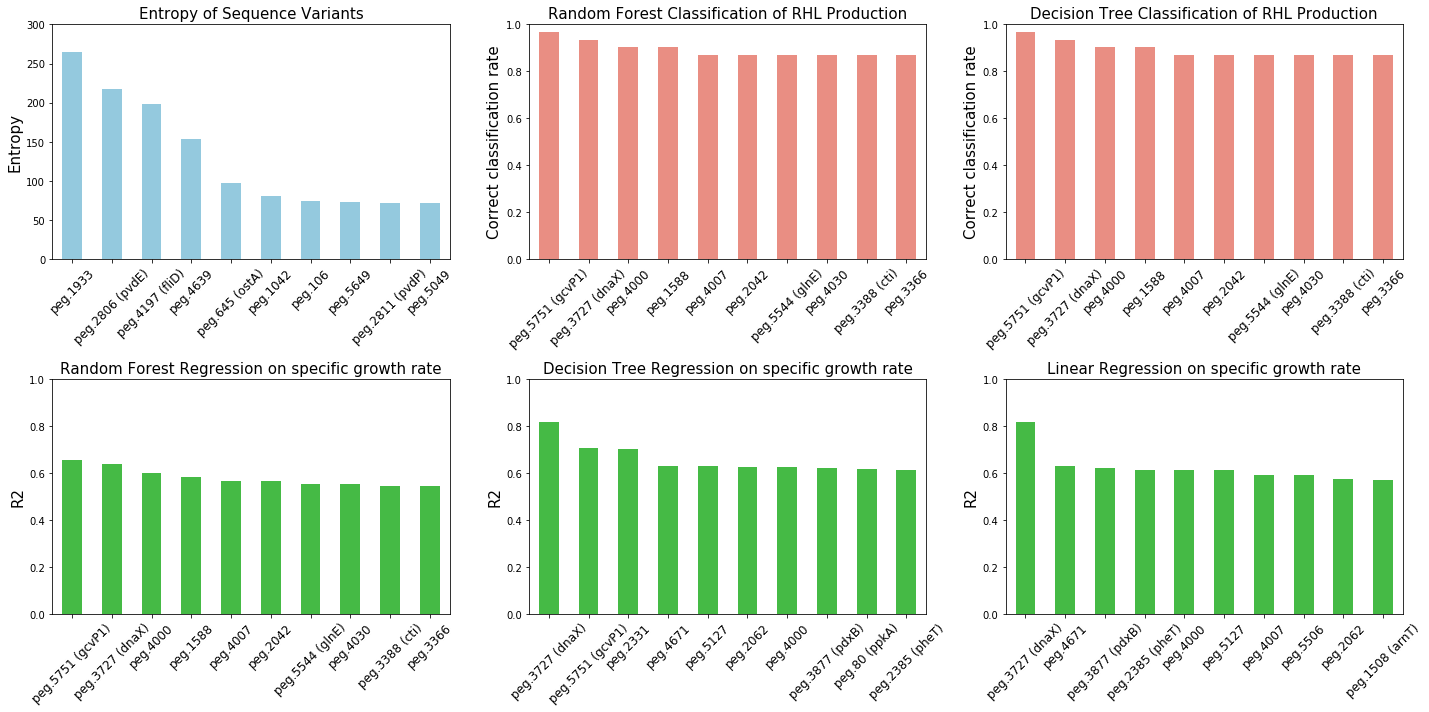

In [10]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)

# entropy
_ = sns.barplot(x='label', y='entropy', data=df_entropy.iloc[0:10,:], color="skyblue", ax=ax[0,0])
_ = ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[0,0], 0.5)
_ = ax[0,0].set_title('Entropy of Sequence Variants', fontsize=15)
_ = ax[0,0].set_xlabel('')
_ = ax[0,0].set_ylabel('Entropy', fontsize=15)
_ = ax[0,0].set_ylim([0,300])

# RF classification of RHL production
_ = sns.barplot(x='label', y='accuracy', data=df_rhl_prediction_rf.iloc[0:10,:], color="salmon", ax=ax[0,1])
_ = ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[0,1], 0.5)
_ = ax[0,1].set_title('Random Forest Classification of RHL Production', fontsize=15)
_ = ax[0,1].set_xlabel('')
_ = ax[0,1].set_ylabel('Correct classification rate', fontsize=15)
_ = ax[0,1].set_ylim([0.,1.0])

# DT classification of RHL production
_ = sns.barplot(x='label', y='accuracy', data=df_rhl_prediction_dt.iloc[0:10,:], color="salmon", ax=ax[0,2])
_ = ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[0,2], 0.5)
_ = ax[0,2].set_title('Decision Tree Classification of RHL Production', fontsize=15)
_ = ax[0,2].set_xlabel('')
_ = ax[0,2].set_ylabel('Correct classification rate', fontsize=15)
_ = ax[0,2].set_ylim([0.,1.0])

# RF regression  on specific growth rate
_ = sns.barplot(x='label', y='R2', data=df_sgr_prediction_rf.iloc[0:10,:], color="limegreen", ax=ax[1,0])
_ = ax[1,0].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[1,0], 0.5)
_ = ax[1,0].set_title('Random Forest Regression on specific growth rate', fontsize=15)
_ = ax[1,0].set_xlabel('')
_ = ax[1,0].set_ylabel('R2', fontsize=15)
_ = ax[1,0].set_ylim([0.,1.0])

# DT regression on specific growth rate
_ = sns.barplot(x='label', y='R2', data=df_sgr_prediction_dt.iloc[0:10,:], color="limegreen", ax=ax[1,1])
_ = ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[1,1], 0.5)
_ = ax[1,1].set_title('Decision Tree Regression on specific growth rate', fontsize=15)
_ = ax[1,1].set_xlabel('')
_ = ax[1,1].set_ylabel('R2', fontsize=15)
_ = ax[1,1].set_ylim([0.,1.0])

# Linear regression on specific growth rate
_ = sns.barplot(x='label', y='R2', data=df_sgr_prediction_lin.iloc[0:10,:], color="limegreen", ax=ax[1,2])
_ = ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[1,2], 0.5)
_ = ax[1,2].set_title('Linear Regression on specific growth rate', fontsize=15)
_ = ax[1,2].set_xlabel('')
_ = ax[1,2].set_ylabel('R2', fontsize=15)
_ = ax[1,2].set_ylim([0.,1.0])


plt.tight_layout()
plt.show()

## plot glycerol uptake proteins

In [38]:
# GlpF: fig|287.6770.peg.1481
# GlpK: fig|287.6770.peg.1480
# GlpD: fig|287.6770.peg.1477
# GlpR: fig|287.6770.peg.1478
# TpiA: fig|287.6770.peg.5263
# Fda: fig|287.6770.peg.602
glycerol_uptake_proteins = ['peg.1477 (glpD)','peg.1478 (glpR)','peg.1480 (glpK)','peg.1481 (glpF)','peg.5263 (tpiA)','peg.602 (fda)']

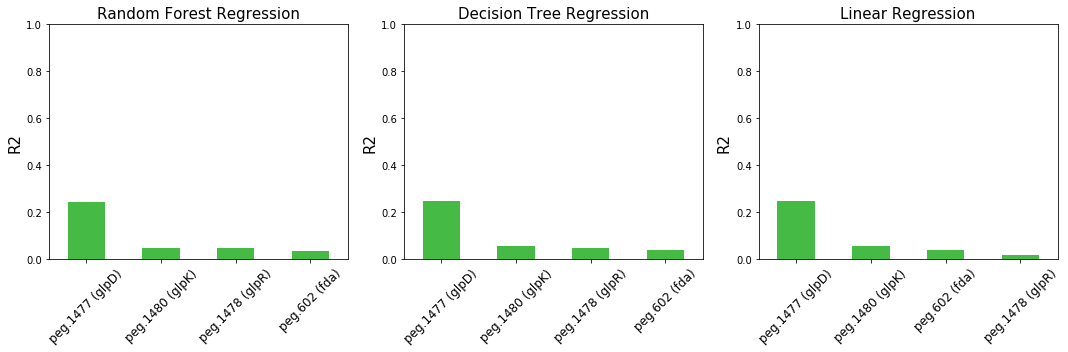

In [42]:
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3)

# RF regression  on specific growth rate
_ = sns.barplot(x='label', y='R2', data=df_sgr_prediction_rf[df_sgr_prediction_rf.label.isin(glycerol_uptake_proteins)], color="limegreen", ax=ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[0], 0.5)
_ = ax[0].set_title('Random Forest Regression', fontsize=15)
_ = ax[0].set_xlabel('')
_ = ax[0].set_ylabel('R2', fontsize=15)
_ = ax[0].set_ylim([0.,1.0])

# DT regression on specific growth rate
_ = sns.barplot(x='label', y='R2', data=df_sgr_prediction_dt[df_sgr_prediction_dt.label.isin(glycerol_uptake_proteins)], color="limegreen", ax=ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[1], 0.5)
_ = ax[1].set_title('Decision Tree Regression', fontsize=15)
_ = ax[1].set_xlabel('')
_ = ax[1].set_ylabel('R2', fontsize=15)
_ = ax[1].set_ylim([0.,1.0])

# Linear regression on specific growth rate
_ = sns.barplot(x='label', y='R2', data=df_sgr_prediction_lin[df_sgr_prediction_lin.label.isin(glycerol_uptake_proteins)], color="limegreen", ax=ax[2])
_ = ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, fontsize=12)
change_width(ax[2], 0.5)
_ = ax[2].set_title('Linear Regression', fontsize=15)
_ = ax[2].set_xlabel('')
_ = ax[2].set_ylabel('R2', fontsize=15)
_ = ax[2].set_ylim([0.,1.0])

plt.tight_layout()
plt.show()